In [1]:
%matplotlib inline

import pandas as pd
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

## Task #1: Examine Data
---

In [2]:
# Load data
california_housing_dataframe = shuffle(pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=","))

# Preprocess data
from mlcclib import preprocess_chd

training_observations = preprocess_chd("features", california_housing_dataframe.head(12000))
training_targets = preprocess_chd("targets", california_housing_dataframe.head(12000))

validation_observations = preprocess_chd("features", california_housing_dataframe.head(5000))
validation_targets = preprocess_chd("targets", california_housing_dataframe.head(5000))

### Training data

In [3]:
print("Features")
display.display(training_observations.describe())

print("\nTargets")
display.display(training_targets.describe())

Features


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.5,28.6,2663.0,542.8,1438.1,504.8,3.9,2.0
std,2.1,2.0,12.6,2190.3,420.1,1140.0,383.9,1.9,1.2
min,32.5,-124.3,1.0,2.0,1.0,6.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1469.8,300.0,795.0,283.0,2.6,1.5
50%,34.2,-118.5,29.0,2149.0,438.0,1175.0,411.0,3.5,1.9
75%,37.7,-118.0,37.0,3172.0,656.0,1742.0,610.0,4.7,2.3
max,42.0,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,55.2



Targets


,median_house_value
count,12000.0
mean,206.4
std,115.9
min,15.0
25%,119.4
50%,179.7
75%,262.5
max,500.0


### Validation Data

In [4]:
print("Features")
display.display(validation_observations.describe())

print("\nTargets")
display.display(validation_targets.describe())

Features


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.5,28.7,2672.2,541.8,1423.5,502.9,3.9,2.0
std,2.1,2.0,12.7,2183.6,415.9,1072.0,379.3,1.9,1.4
min,32.6,-124.2,2.0,8.0,1.0,11.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1469.8,295.0,791.0,279.0,2.5,1.5
50%,34.2,-118.5,29.0,2143.5,437.0,1176.0,408.0,3.6,1.9
75%,37.7,-118.0,37.0,3201.2,658.2,1730.5,610.0,4.8,2.3
max,41.9,-114.6,52.0,30405.0,4407.0,12873.0,4012.0,15.0,55.2



Targets


,median_house_value
count,5000.0
mean,208.1
std,116.4
min,15.0
25%,120.7
50%,181.8
75%,267.5
max,500.0


## Task #2: Plot Lat/Lon vs. Median House Value
---

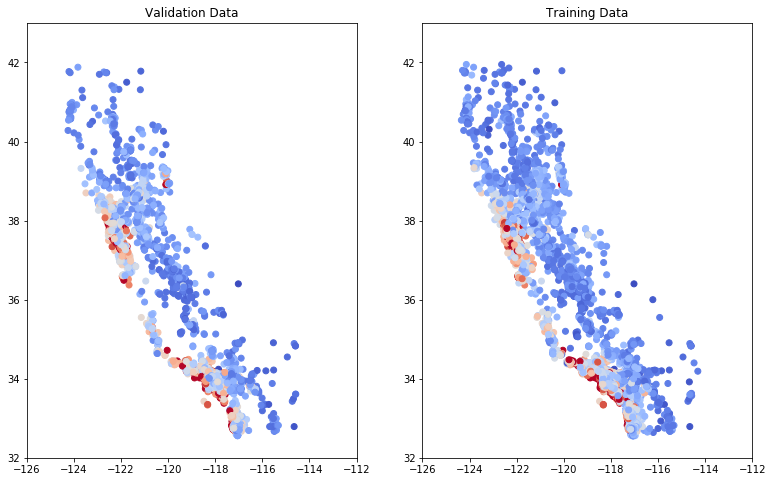

In [5]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_autoscalex_on(False)
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])

plt.scatter(
    validation_observations["longitude"],
    validation_observations["latitude"],
    cmap="coolwarm",
    c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max()
)

ax = plt.subplot(1, 2, 2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_autoscalex_on(False)
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])

plt.scatter(
    training_observations["longitude"],
    training_observations["latitude"],
    cmap="coolwarm",
    c=training_targets["median_house_value"] / training_targets["median_house_value"].max()
)

plt.show()

## Task 4: Train & Evaluate a Model
---

In [6]:
from mlcclib import linear_inputfunc, construct_feature_cols, train_model
help(linear_inputfunc)
help(construct_feature_cols)
help(train_model)

Help on function linear_inputfunc in module mlcclib.mlcclib:

linear_inputfunc(features, targets, batch_sz=1, shuffle=True, num_epochs=None)
    :param features: pandas df of features
    :param targets: pandas df of targets
    :param batch_sz: Size of batches passed to the model
    :param shuffle: Whether to shuffle the data
    :param num_epochs: Repeat count; None = indefinitely
    :return: tuple of (features, labels) for the next data batch

Help on function construct_feature_cols in module mlcclib.mlcclib:

construct_feature_cols(input_features)
    :param input_features: Names of numerical input features to use
    :return: A set of corresponding feature columns

Help on function train_model in module mlcclib.train_model:

train_model(learning_rate, steps, batch_sz, training_observations, training_targets, validation_observations, validation_targets)
    :param learning_rate: float, the learning rate
    :param steps: int, the total number of training steps (fwd & bckwd pass o

In [7]:
learning_rate = 0.0001
steps = 100
batch_sz = 5

linear_regressor, calibration_data = train_model(
    learning_rate,
    steps,
    batch_sz,
    training_observations,
    training_targets,
    validation_observations,
    validation_targets
)

RMSE (on training data):


Period: 0	Loss: 222.95


Period: 1	Loss: 210.19


Period: 2	Loss: 198.55


Period: 3	Loss: 188.30


Period: 4	Loss: 179.64


Period: 5	Loss: 172.82


Period: 6	Loss: 168.81


NameError: name 'calibration_data' is not defined

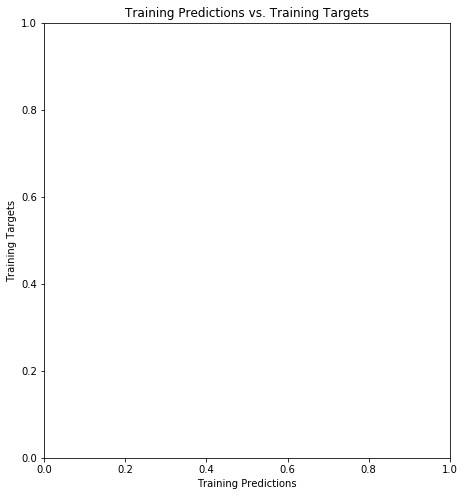

In [11]:
# Plot the predictions vs targets
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Training Predictions vs. Training Targets")
plt.xlabel("Training Predictions")
plt.ylabel("Training Targets")
plt.scatter(calibration_data["training_predictions"], training_targets)

plt.subplot(1, 2, 2)
plt.title("Validation Predictions vs. Validation Targets")
plt.xlabel("Validation Predictions")
plt.ylabel("Validation Targets")
plt.scatter(calibration_data["validation_predictions"], validation_targets)

plt.show()